<a href="https://colab.research.google.com/github/Sumayya-pa/GreenLens/blob/main/GreenLens2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir_path = "gdrive/My Drive/Dataset/TRAIN/"

In [ ]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import image from
img_width, img_height = 224, 224


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
train_data_dir = '/content/gdrive/MyDrive/Dataset/TRAIN'
validation_data_dir = '/content/gdrive/MyDrive/Dataset/TEST'
epochs = 10
batch_size = 16


In [ ]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')




Found 124 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_1 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        8

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(0.001),
             metrics=['accuracy'])

In [ ]:
class_names=["Jackfruit","Mango"]

In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model2.h5",save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
history=model.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
    callbacks = [checkpoint_cb,early_stopping_cb]
    )

Epoch 1/30
8/8 [==============================] - 39s 5s/step - loss: 1.0644 - accuracy: 0.5049 - val_loss: 0.6763 - val_accuracy: 0.7895
Epoch 2/30
8/8 [==============================] - 7s 791ms/step - loss: 0.6704 - accuracy: 0.5458 - val_loss: 0.6221 - val_accuracy: 0.5526
Epoch 3/30
8/8 [==============================] - 6s 786ms/step - loss: 0.5390 - accuracy: 0.7302 - val_loss: 0.5699 - val_accuracy: 0.7895
Epoch 4/30
8/8 [==============================] - 7s 814ms/step - loss: 0.5613 - accuracy: 0.7093 - val_loss: 0.4630 - val_accuracy: 0.7895
Epoch 5/30
8/8 [==============================] - 6s 786ms/step - loss: 0.4384 - accuracy: 0.8233 - val_loss: 0.5262 - val_accuracy: 0.6842
Epoch 6/30
8/8 [==============================] - 6s 782ms/step - loss: 0.4824 - accuracy: 0.7725 - val_loss: 0.4784 - val_accuracy: 0.7895
Epoch 7/30
8/8 [==============================] - 6s 774ms/step - loss: 0.4324 - accuracy: 0.8230 - val_loss: 0.4291 - val_accuracy: 0.7895
Epoch 8/30
8/8 [======

In [ ]:
model.save('binaryimageclassifiermodel.h5')

In [ ]:
ev=model.evaluate( validation_generator)

3/3 [==============================] - 1s 138ms/step - loss: 0.2264 - accuracy: 0.8947


In [ ]:
STEP_SIZE_TEST= validation_generator.n// validation_generator.batch_size
validation_generator.reset()
preds = model.predict( validation_generator,
verbose=1)

3/3 [==============================] - 1s 128ms/step


In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Mango",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Jackfruit",fontsize=30)

In [ ]:
import matplotlib.pyplot as plt

[[0.]]


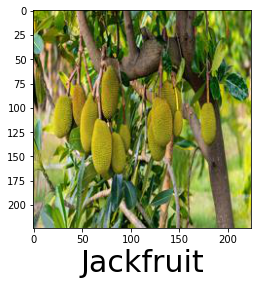

In [73]:
predictImage(r"/content/gdrive/MyDrive/Dataset/TEST/JACKFRUIT/MGjackfruit_79.jpeg")

In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.2MB 3.8MB/s 
     |████████████████████████████████| 174kB 36.1MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
     |████████████████████████████████| 4.2MB 36.0MB/s 
     |████████████████████████████████| 112kB 39.9MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 122kB 39.6MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=6fa13d56be59dc397622d07141304004161ff3b59aba3fd953173ad3292a9ff6
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
  Found existing installation: ipykernel 4.1

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
 
st.set_option('deprecation.showfileUploderEncoding', False)
@st.cache(allow_ouput_mutation=True)
def load_model():
   model=tf.keras.models.load_model('/content/Best_Model2.h5')
   return model
 model=load_model()
  st.write("""
           # GreenLens
           """
           )
 
 file = st.file_uploader("please upload an image", type=["jpg","png"])
 import cv2
 from PIL import Image, ImageOps
 import numpy as np
 def import_and_predict(image_data, model):
    
          size = (224,224)
          image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
          img = np.asarray(image)
          img_reshape = img[np.newaxis,...]
          prediction = model.predict(img_reshape) 
 
          return prediction
if file is None:
     st.text("please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names=['Jackfruit','Mango']
    string="This image most likely is: "+class_names[np.argmax(predictions)]
    st.success(string)



Overwriting app.py


In [ ]:

!pip install pyngrok

     |████████████████████████████████| 747kB 4.0MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=5f22e5ac278c728a392b77f292f79ad99a30d7d9ae110a8eadf392f585bcaeff
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-05-23 15:20:40--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.200.57.5, 3.216.229.131, 3.215.197.222, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.200.57.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  41.5MB/s    in 0.3s    

2021-05-23 15:20:40 (41.5 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: http://bb34b12c4fe1.ngrok.io


In [ ]:
!streamlit run /content/app.py

  Stopping...
^C
